In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (6,6)

In [2]:
df = pd.read_csv('data/rent_2.csv')
df.head()

,Unnamed: 0,Price,Pid,Property_name,Address,Neighboorhood
0,0,400000,H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos,Ajah
1,1,14000000,G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos,Ikoyi
2,2,200000,H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos,Yaba
3,3,800000,H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos,Surulere
4,4,300000,H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos,Yaba


In [3]:
df.shape

(9853, 6)

In [4]:
df.isnull().sum()

Unnamed: 0       0
Price            0
Pid              0
Property_name    0
Address          0
Neighboorhood    0
dtype: int64

In [5]:
df = df.drop(['Unnamed: 0', 'Pid', 'Address'], axis='columns')
df.head()

,Price,Property_name,Neighboorhood
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba


In [6]:
def is_num(x):
    tokens = x.split(' ')[0]
    try:
        int(tokens)
    except:
        return False
    return True

In [7]:
df2 = df[df.Property_name.apply(is_num)]
df2.head()

,Price,Property_name,Neighboorhood
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba


In [8]:
df_office_and_shop = df[~df.Property_name.apply(is_num)]
df_office_and_shop.head(10)

,Price,Property_name,Neighboorhood
6,300000,Self Contain for rent Akoka Abule-Oja Yaba Lagos,Yaba
11,7000,Shop for rent Fola Agoro Yaba Lagos,Yaba
13,500000,Office Space for rent GRA Phase 2 Beside Karis...,Kosofe
27,1500000,300.0 square meter Flat / Apartment for rent A...,Yaba
37,250000,Flat / Apartment for rent Shomolu Shomolu Lagos,Shomolu
41,300000,Self Contain for rent Shomolu Shomolu Lagos,Shomolu
43,5000000,Flat / Apartment for rent Adeola Odeku Victori...,VI
48,120000,Shop for rent Akoka Yaba Lagos,Yaba
73,300000,Self Contain for rent Abule-Oja Yaba Lagos,Yaba
74,300000,Self Contain for rent Abule-Oja Yaba Lagos,Yaba


In [9]:
df_office_and_shop.shape

(1022, 3)

In [10]:
df2['bedroom'] = df2.Property_name.apply(lambda x: x.split(' ')[0])
df2.head(10)

C:\Users\CELESTINE TYJC\AppData\Local\Temp\ipykernel_16740\4115023072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom'] = df2.Property_name.apply(lambda x: x.split(' ')[0])


,Price,Property_name,Neighboorhood,bedroom
0,400000,1 bedroom mini flat Flat / Apartment for rent ...,Ajah,1
1,14000000,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi,3
2,200000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,1
3,800000,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere,2
4,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,1
5,300000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,1
7,600000,2 bedroom Flat / Apartment for rent Akoka Yaba...,Yaba,2
8,450000,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,1
9,1000000,3 bedroom Flat / Apartment for rent Alapere Ko...,Alapere,3
10,500000,2 bedroom Flat / Apartment for rent Palmgroove...,Shomolu,2


In [11]:
df2.shape

(8831, 4)

In [12]:
df2.bedroom.value_counts()

3     3967
2     1750
4     1207
1     1156
5      593
6       67
7       38
10      35
8       14
9        4
Name: bedroom, dtype: int64

In [13]:
df2['bedroom'] = df2.bedroom.apply(lambda x: int(x))

C:\Users\CELESTINE TYJC\AppData\Local\Temp\ipykernel_16740\1650627025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom'] = df2.bedroom.apply(lambda x: int(x))


In [14]:
df2[df2['bedroom'] >= 6].head()

,Price,Property_name,Neighboorhood,bedroom
111,3000000,6 bedroom Duplex for rent Oke-Alo Millenuim/UP...,Gbagada,6
119,3500000,6 bedroom Duplex for rent Gbagada Phase2 Phase...,Gbagada,6
180,2500000,6 bedroom Duplex for rent Kilo-Marsha Surulere...,Surulere,6
410,3800000,7 bedroom Duplex for rent Okealo Millenuim/UPS...,Gbagada,7
463,12000000,7 bedroom Commercial Property for rent Ademola...,VI,7


In [15]:
print(df2.Neighboorhood.unique().shape[0])
df2.Neighboorhood.value_counts()

40


Lekki           1594
Yaba             934
Ikeja            636
Surulere         563
Ojo              522
Ikoyi            511
Gbagada          461
Ajah             427
VI               374
Kosofe           278
Ogba             265
Ipaja            241
Okota            209
Isolo            203
Shomolu          197
Maryland         177
Sangotedo        159
Ikorodu          146
Ogudu            145
Amuwo-Odofin     123
Alimosho         108
Abule-Egba        93
Alapere           85
Oshodi            56
Ilupeju           55
Bariga            49
Agege             48
Igando            36
Apapa             22
Ibeju-Lekki       22
Ikosi             19
Badagry           17
Idimu             16
Mushin            12
Orile              8
VGC                6
Ejigbo             5
Lagos-Island       4
Ifako-Ijaiye       3
Obalende           2
Name: Neighboorhood, dtype: int64

In [16]:
df2.Price.describe()

count    8.831000e+03
mean     2.380828e+06
std      7.950422e+06
min      5.000000e+02
25%      6.000000e+05
50%      1.000000e+06
75%      2.500000e+06
max      6.000000e+08
Name: Price, dtype: float64

In [17]:
list(df2.Price.describe())

[8831.0,
 2380827.9130336316,
 7950421.701710134,
 500.0,
 600000.0,
 1000000.0,
 2500000.0,
 600000000.0]

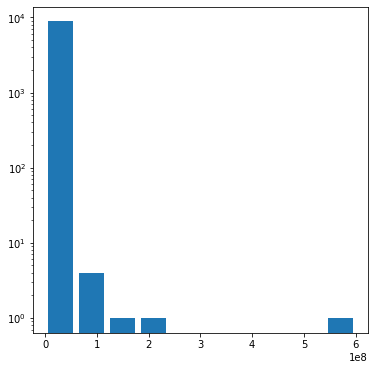

In [18]:

plt.hist(df2.Price, rwidth=0.8, log=True)
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

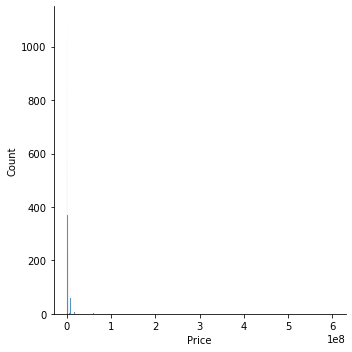

In [19]:
import seaborn as sns
sns.displot(df2.Price)

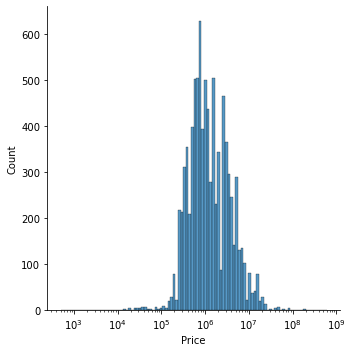

In [20]:
sns.displot(df2.Price, log_scale=True)

<h2 style='color: blue'>Price Outlier Remover using 1 standard deviation</h2>
Grouping it by Neighboorhood

In [21]:
def outlier_price_remover(df):
    out_df = pd.DataFrame()
    for location, location_df in df.groupby('Neighboorhood'):
        m = np.mean(location_df.Price)
        std = np.std(location_df.Price)    
        reduce_df = location_df[(location_df.Price >(m-std)) & (location_df.Price <=(m+std))]
        out_df = pd.concat([out_df, reduce_df], ignore_index=True)
    return out_df 
df3 = outlier_price_remover(df2)
df3.head()

,Price,Property_name,Neighboorhood,bedroom
0,300000,3 bedroom Flat / Apartment for rent Ekoro Abul...,Abule-Egba,3
1,400000,3 bedroom Duplex for rent Alagbado Abule Egba ...,Abule-Egba,3
2,500000,3 bedroom Flat / Apartment for rent Social clu...,Abule-Egba,3
3,300000,2 bedroom Flat / Apartment for rent Olaniyi Ar...,Abule-Egba,2
4,400000,3 bedroom Flat / Apartment for rent Olaniyi Ar...,Abule-Egba,3


In [22]:
print(df3.shape)
df2.shape[0]-df3.shape[0]

(8050, 4)


781

In [23]:
df3.Price.describe()

count    8.050000e+03
mean     1.982380e+06
std      2.481905e+06
min      5.000000e+02
25%      6.000000e+05
50%      1.000000e+06
75%      2.500000e+06
max      2.400000e+07
Name: Price, dtype: float64

In [24]:
list(df3.Price.describe())

[8050.0,
 1982380.2857142857,
 2481904.707506435,
 500.0,
 600000.0,
 1000000.0,
 2500000.0,
 24000000.0]

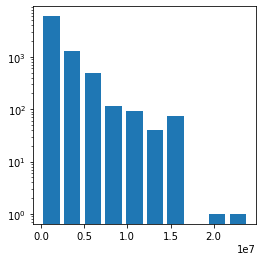

In [25]:
plt.hist(df3.Price, rwidth=0.8, log=True)
plt.show()

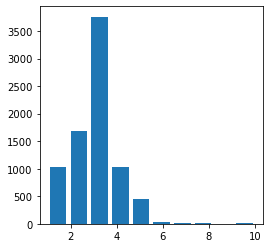

In [26]:
plt.hist(df3.bedroom, rwidth=0.8)
plt.rcParams['figure.figsize'] = (6, 6)

<h2 style='color: blue'>Bedroom Outlier Remover</h2>
<h3 style='color: purple'>Removing rows with no. of bedroom higher then 7 bedrooms</h3>

In [27]:
print(df3[df3.bedroom >= 8].shape)
df4 = df3[df3.bedroom < 8]
df4.head()

(27, 4)


,Price,Property_name,Neighboorhood,bedroom
0,300000,3 bedroom Flat / Apartment for rent Ekoro Abul...,Abule-Egba,3
1,400000,3 bedroom Duplex for rent Alagbado Abule Egba ...,Abule-Egba,3
2,500000,3 bedroom Flat / Apartment for rent Social clu...,Abule-Egba,3
3,300000,2 bedroom Flat / Apartment for rent Olaniyi Ar...,Abule-Egba,2
4,400000,3 bedroom Flat / Apartment for rent Olaniyi Ar...,Abule-Egba,3


(array([1032., 1689.,    0., 3760.,    0., 1035.,  445.,    0.,   40.,
          22.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

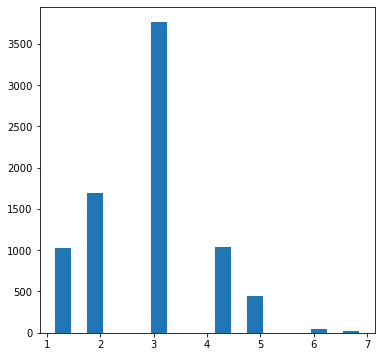

In [28]:
plt.hist(df4.bedroom, rwidth=0.5)

In [29]:
df4.Neighboorhood.value_counts()

Lekki           1558
Yaba             817
Ikeja            624
Ojo              506
Surulere         501
Ikoyi            411
Ajah             408
Gbagada          358
VI               355
Ogba             237
Ipaja            236
Okota            199
Isolo            192
Kosofe           186
Shomolu          180
Sangotedo        157
Maryland         149
Ogudu            144
Ikorodu          136
Alimosho         104
Amuwo-Odofin      97
Alapere           84
Abule-Egba        71
Oshodi            50
Ilupeju           50
Igando            35
Bariga            34
Agege             33
Ibeju-Lekki       21
Apapa             20
Ikosi             16
Badagry           14
Mushin            11
Idimu             11
Orile              7
VGC                4
Ejigbo             3
Lagos-Island       2
Ifako-Ijaiye       2
Name: Neighboorhood, dtype: int64

<h2 style='color: blue'>Comparing Price of 2 bedroom & 3 bedroom in same Neighboorhood</h2>

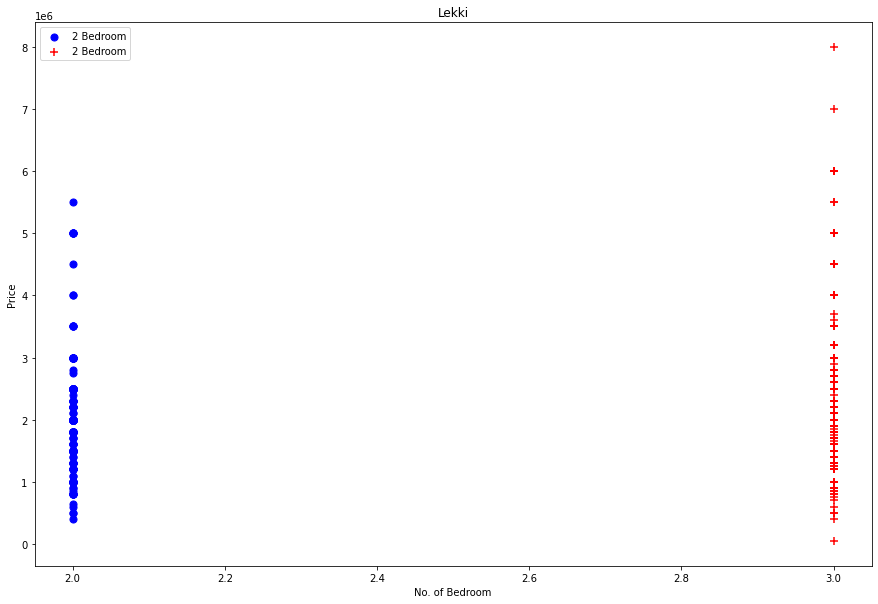

In [30]:
def plot_scatter_plot(df, location):
    bedroom2 = df[(df.Neighboorhood == location) & (df.bedroom == 2)]
    bedroom3 = df[(df.Neighboorhood == location) & (df.bedroom == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bedroom2.bedroom, bedroom2.Price, color='blue', label='2 Bedroom', s=50)
    plt.scatter(bedroom3.bedroom, bedroom3.Price, color='red', marker='+', label='2 Bedroom', s=50) 
    plt.xlabel('No. of Bedroom')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    

plot_scatter_plot(df4, 'Lekki')    

In [31]:
def bedroom_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Neighboorhood'):
        bedroom_stats = {}
        for br, br_df in location_df.groupby('bedroom'):
            bedroom_stats[br] = {
                'mean': np.mean(br_df.Price),
                'std': np.std(br_df.Price),
                'count': br_df.shape[0]
            }
        for br, br_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(br-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, br_df[br_df.Price<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
    
df5 = bedroom_outlier_remover(df4)
df5.shape

(6452, 4)

In [32]:
df4.shape[0]-df5.shape[0]

1571

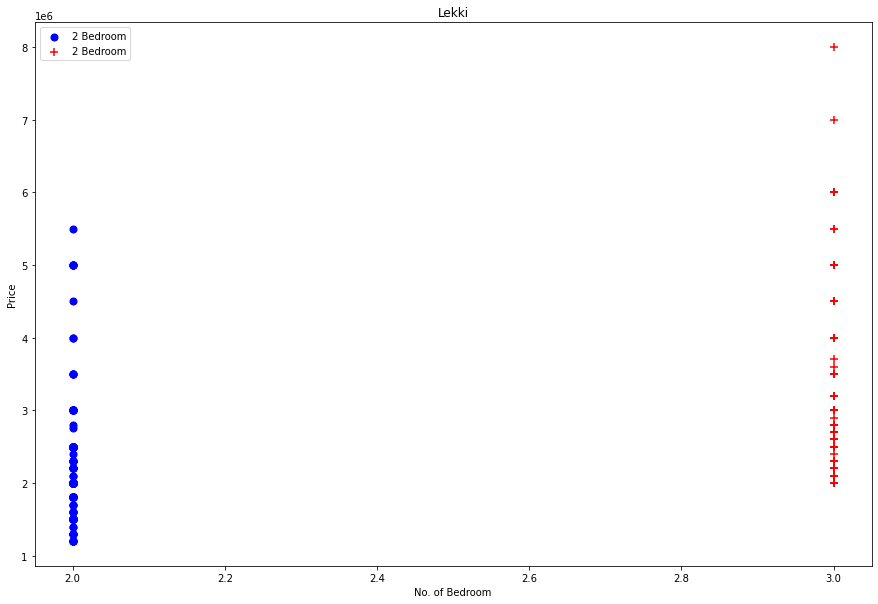

In [33]:
plot_scatter_plot(df5, 'Lekki')    

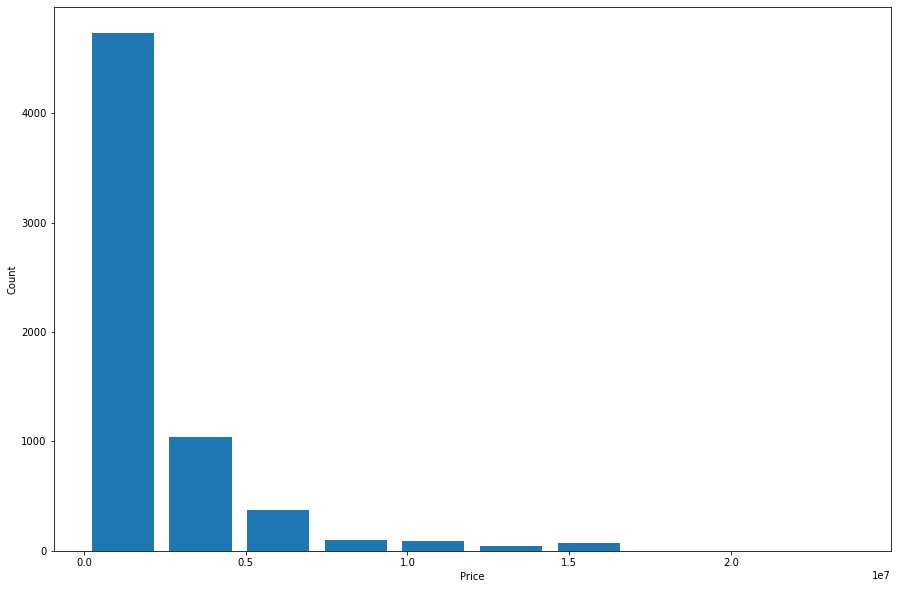

In [34]:
plt.hist(df5.Price, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [35]:
df6 = df5.drop('Property_name', axis='columns')
df6.head()

,Price,Neighboorhood,bedroom
1,400000,Abule-Egba,3
2,500000,Abule-Egba,3
3,300000,Abule-Egba,2
4,400000,Abule-Egba,3
6,350000,Abule-Egba,2


In [36]:
dummies = pd.get_dummies(df6.Neighboorhood)
dummies.head(3)

,Abule-Egba,Agege,Ajah,Alapere,Alimosho,Amuwo-Odofin,Apapa,Badagry,Bariga,Ejigbo,...,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI,Yaba
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df7 = pd.concat([df6, dummies], axis='columns')
df7.head(3)

,Price,Neighboorhood,bedroom,Abule-Egba,Agege,Ajah,Alapere,Alimosho,Amuwo-Odofin,Apapa,...,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI,Yaba
1,400000,Abule-Egba,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,500000,Abule-Egba,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300000,Abule-Egba,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df8 = df7.drop(['Neighboorhood', 'Yaba'], axis='columns')
df8.head(3)

,Price,bedroom,Abule-Egba,Agege,Ajah,Alapere,Alimosho,Amuwo-Odofin,Apapa,Badagry,...,Ogudu,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI
1,400000,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,500000,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300000,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x = df8.drop('Price', axis='columns').values
x[:1]

array([[3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [40]:
y = df8.Price
y.head(3)

1    400000
2    500000
3    300000
Name: Price, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(df8.shape[0], x_train.shape[0], x_test.shape[0])

6452 5161 1291


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.800936068155607

#### Use K Fold Cross Validation to check the accuracy of our LinearRegression model

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.80093607, 0.7847125 , 0.76282091, 0.81583831, 0.78901866])

### Find the best model using GridSeachCV

In [44]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(x, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision_Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'Model': algo_name,
            'Best Score': gs.best_score_,
            'Best Params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['Model', 'Best Score', 'Best Params']) 
find_best_model_using_gridsearch(x, y)

C:\Users\CELESTINE TYJC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\CELESTINE TYJC\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make

,Model,Best Score,Best Params
0,LinearRegression,0.790665,{'normalize': True}
1,lasso,0.790672,"{'alpha': 2, 'selection': 'cyclic'}"
2,Decision_Tree,0.824673,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [45]:
tree_model = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
tree_model.fit(x_train, y_train)
tree_model.score(x_test, y_test)

0.8360177480745884

In [46]:
# Train set
tree_model.score(x_train, y_train)

0.8405360905561048

In [47]:
df9 = df8.drop('Price', axis='columns')
c = df9.copy()
c.head()

,bedroom,Abule-Egba,Agege,Ajah,Alapere,Alimosho,Amuwo-Odofin,Apapa,Badagry,Bariga,...,Ogudu,Ojo,Okota,Orile,Oshodi,Sangotedo,Shomolu,Surulere,VGC,VI
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
def price_estimator(location, bedroom):
    loc_index = np.where(c.columns == location)[0][0]
        
    b = np.zeros(len(c.columns))
    b[0] = bedroom
    if loc_index >= 0:
        b[loc_index] = 1
        
    return tree_model.predict([b])[0]

price_estimator('Ajah', 3)    

1002176.8707482993

In [49]:
import pickle
with open('lagos_prediction_using_tree.pickle', 'wb') as f:
    pickle.dump(tree_model, f)

In [50]:
import json
columns = {
    'location': [val for val in c.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))